In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0  # Pre-trained model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [2]:
# dataset_dir = 'D:\Research\CNN\Datasets\High'
os.chdir ('D:\Research\CNN\Datasets\Train\High')
os.getcwd()

'D:\\Research\\CNN\\Datasets\\Train\\High'

In [3]:
# Create ImageDataGenerators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Set up directories
train_dir = 'D:\Research\CNN\Datasets\Train'
test_dir = 'D:\Research\CNN\Datasets\Test'

In [5]:
# Prepare data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(386, 298),
    batch_size=3,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(386, 298),
    batch_size=3,
    class_mode='binary')

Found 6830 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [6]:
# Load a pre-trained Vision Transformer model, here we use EfficientNetV2B0 which has similar principles
base_model = EfficientNetV2B0(include_top=False, weights='imagenet', input_tensor=Input(shape=(386, 298, 3)))

In [7]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
# model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=1, validation_data=test_generator, validation_steps=len(test_generator))

In [11]:
# Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs=1,
#     validation_data=test_generator,
#     validation_steps=len(test_generator)
# )
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=1, validation_data=test_generator, validation_steps=len(test_generator))

 752/2277 [========>.....................] - ETA: 24:58 - loss: 10.5832 - accuracy: 0.9051

C:\Users\ASUS\anaconda3\envs\finance_env\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2277/2277 [==============================] - 2200s 961ms/step - loss: 4.4028 - accuracy: 0.9075


In [18]:
print(history.history.keys())  # what keys are available

dict_keys(['loss', 'accuracy'])


In [15]:
# Adjust the key names based on your print result
val_acc_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_acc'
train_acc_key = 'accuracy' if 'accuracy' in history.history else 'acc'

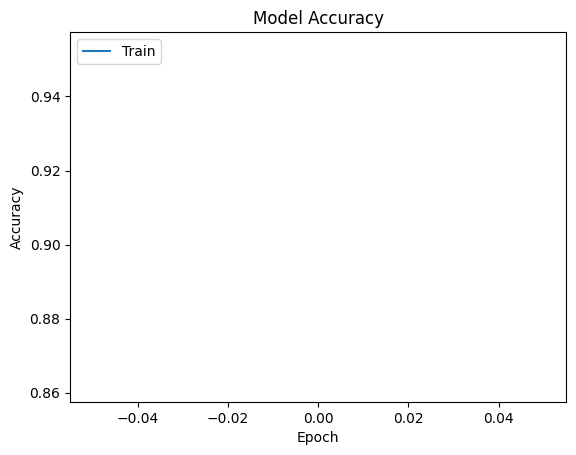

In [19]:
# Plot training & validation accuracy values
# plt.plot(history.history[train_acc_key])
# plt.plot(history.history[val_acc_key])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

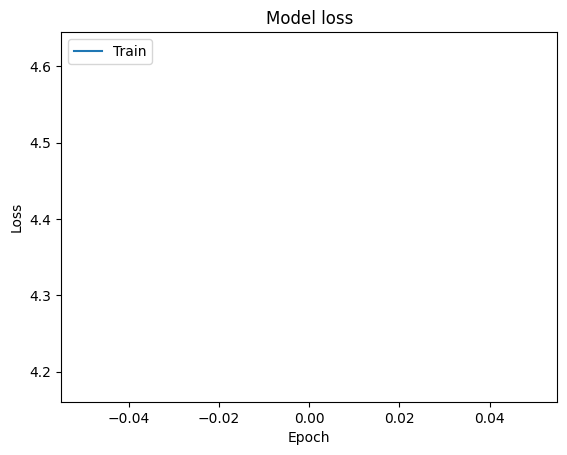

In [20]:
# Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
def check_images(s_dir, ext_list):
    bad_images = []
    bad_ext = []
    for folder in os.listdir(s_dir):
        folder_path = os.path.join(s_dir, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                img = Image.open(file_path)  # open the image file
                img.verify()  # verify that it is, in fact an image
            except (IOError, SyntaxError) as e:
                print('Bad file:', file_path)  # print out the names of corrupt files
                bad_images.append(file_path)
            if file.split('.')[-1].lower() not in ext_list:
                print('Bad extension:', file_path)
                bad_ext.append(file_path)
    return bad_images, bad_ext

bad_files, bad_extensions = check_images('D:\\Research\\CNN\\Datasets\\Train', ['jpg', 'jpeg', 'png'])
print('Corrupt image files:', bad_files)
print('Files with bad extensions:', bad_extensions)

In [ ]:
# Predicting with the trained model
# dir_path = 'D:\Research\CNN\Datasets\Test'
# for i in os.listdir(dir_path):
#     img = tf.keras.preprocessing.image.load_img(os.path.join(dir_path, i), target_size=(386, 298))
#     plt.imshow(img)
#     plt.show()

#     img_array = tf.keras.preprocessing.image.img_to_array(img)
#     img_array = tf.expand_dims(img_array, 0)  # Create a batch
#     img_array /= 255.0  # Rescale the image

#     predictions = model.predict(img_array)
#     print("Prediction:", predictions[0])
#     if predictions[0] < 0.5:
#         print("This is High")
#     else:
#         print("This is Low")

In [ ]:
print("
Epoch 1/10
2277/2277 [==============================] - 2163s 950ms/step - loss: 3.9214 - accuracy: 0.9102
Epoch 2/10
2277/2277 [==============================] - 2198s 965ms/step - loss: 3.8072 - accuracy: 0.9125
Epoch 3/10
2277/2277 [==============================] - 2203s 968ms/step - loss: 3.6889 - accuracy: 0.9150
Epoch 4/10
2277/2277 [==============================] - 2175s 955ms/step - loss: 3.9150 - accuracy: 0.9080
Epoch 5/10
2277/2277 [==============================] - 2180s 957ms/step - loss: 4.1208 - accuracy: 0.9053
Epoch 6/10
2277/2277 [==============================] - 2165s 951ms/step - loss: 4.2315 - accuracy: 0.9047
Epoch 7/10
2277/2277 [==============================] - 2188s 961ms/step - loss: 4.3826 - accuracy: 0.9025
Epoch 8/10
2277/2277 [==============================] - 2172s 954ms/step - loss: 4.4582 - accuracy: 0.9067
Epoch 9/10
2277/2277 [==============================] - 2189s 962ms/step - loss: 4.5199 - accuracy: 0.9078
Epoch 10/10
2277/2277 [==============================] - 2200s 966ms/step - loss: 4.4028 - accuracy: 0.9075
")